## 변속기와 실린더로 co2 emission을 회기분석

In [3]:
data = pd.read_csv('../data/CO2 Emissions_Canada.csv')
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


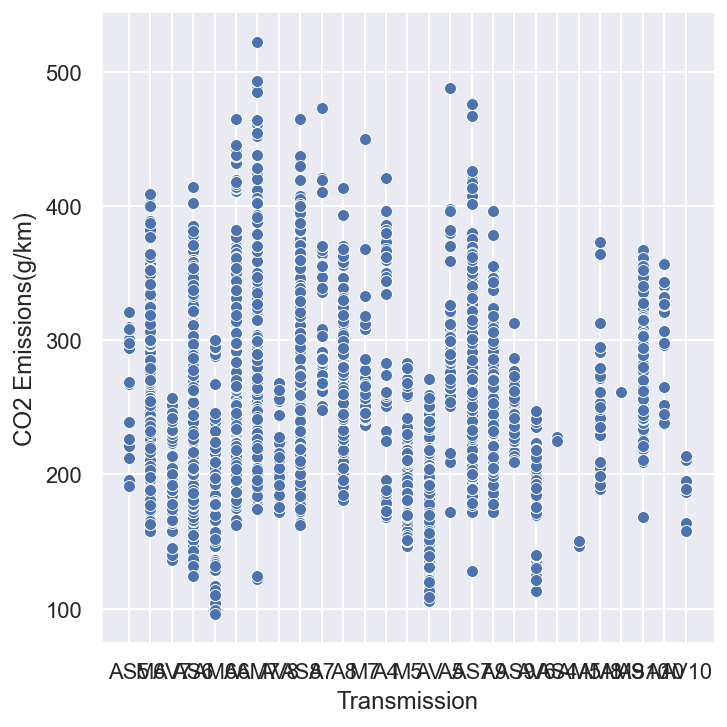

In [12]:
sns.relplot(x='Transmission', y='CO2 Emissions(g/km)', data=data);

In [13]:
data['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [15]:
def GetTransGear(s):
    try: 
        int(s[-2:])
        return s[-2:]
    except ValueError:
        try:
            int(s[-1])
            return s[-1]
        except ValueError:
            return '6'

In [16]:
GetTransGear('AV')

'6'

In [17]:
data_trans = data.copy()
data_trans['Trans_val'] = list(map(lambda s: GetTransNum(s),data['Transmission'].values))
data_trans['Trans_type'] = list(map(lambda s : s.split(GetTransNum(s))[0] , data['Transmission'].values))
data_trans = data_trans[['Trans_val', 'Trans_type']]
data_trans.head()

,Trans_val,Trans_type
0,5,AS
1,6,M
2,7,AV
3,6,AS
4,6,AS


In [18]:
data_trans.describe()

,Trans_val,Trans_type
count,7385,7385
unique,7,5
top,6,AS
freq,3554,3127


In [19]:
data_trans['Trans_val'] = data_trans['Trans_val'].astype('int')

In [20]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Trans_val   7385 non-null   int64 
 1   Trans_type  7385 non-null   object
dtypes: int64(1), object(1)
memory usage: 115.5+ KB


### encoding

In [21]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
trans_type = data_trans['Trans_type'].to_numpy().reshape(-1, 1)
trans_1hot = cat_encoder.fit_transform(trans_type)
trans_array = trans_1hot.toarray()
trans_array.shape

(7385, 5)

In [22]:
list(data_trans['Trans_type'].unique())

['AS', 'M', 'AV', 'AM', 'A']

In [23]:
data_trans[list(data_trans['Trans_type'].unique())] = trans_array

In [25]:
data_trans = data_trans.drop(columns='Trans_type')
data_trans.head()

,Trans_val,AS,M,AV,AM,A
0,5,0.0,0.0,1.0,0.0,0.0
1,6,0.0,0.0,0.0,0.0,1.0
2,7,0.0,0.0,0.0,1.0,0.0
3,6,0.0,0.0,1.0,0.0,0.0
4,6,0.0,0.0,1.0,0.0,0.0


In [26]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Trans_val  7385 non-null   int64  
 1   AS         7385 non-null   float64
 2   M          7385 non-null   float64
 3   AV         7385 non-null   float64
 4   AM         7385 non-null   float64
 5   A          7385 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 346.3 KB


### 최종 DataFrame

In [62]:
## feature 만 있는 df
data_tc = data_trans.copy()
data_tc['Cylinders'] = data['Cylinders']
data_tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Trans_val  7385 non-null   int64  
 1   AS         7385 non-null   float64
 2   M          7385 non-null   float64
 3   AV         7385 non-null   float64
 4   AM         7385 non-null   float64
 5   A          7385 non-null   float64
 6   Cylinders  7385 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 404.0 KB


In [107]:
data_tc['Cylinders'].unique()

array([ 4,  6, 12,  8, 10,  3,  5, 16])

In [63]:
data_tc.describe()

,Trans_val,AS,M,AV,AM,A,Cylinders
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,6.851185,0.250643,0.087475,0.423426,0.077996,0.160460,5.615030
std,1.197542,0.433413,0.282548,0.494135,0.268183,0.367057,1.828307
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000
max,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000


In [64]:
## feature와 label까지 있는 df
data_tc_l = data_tc.copy()
data_tc_l['label'] = data['CO2 Emissions(g/km)']
data_tc_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Trans_val  7385 non-null   int64  
 1   AS         7385 non-null   float64
 2   M          7385 non-null   float64
 3   AV         7385 non-null   float64
 4   AM         7385 non-null   float64
 5   A          7385 non-null   float64
 6   Cylinders  7385 non-null   int64  
 7   label      7385 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 461.7 KB


In [68]:
## label
labels = data['CO2 Emissions(g/km)']
labels.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2 Emissions(g/km), dtype: int64

## eda

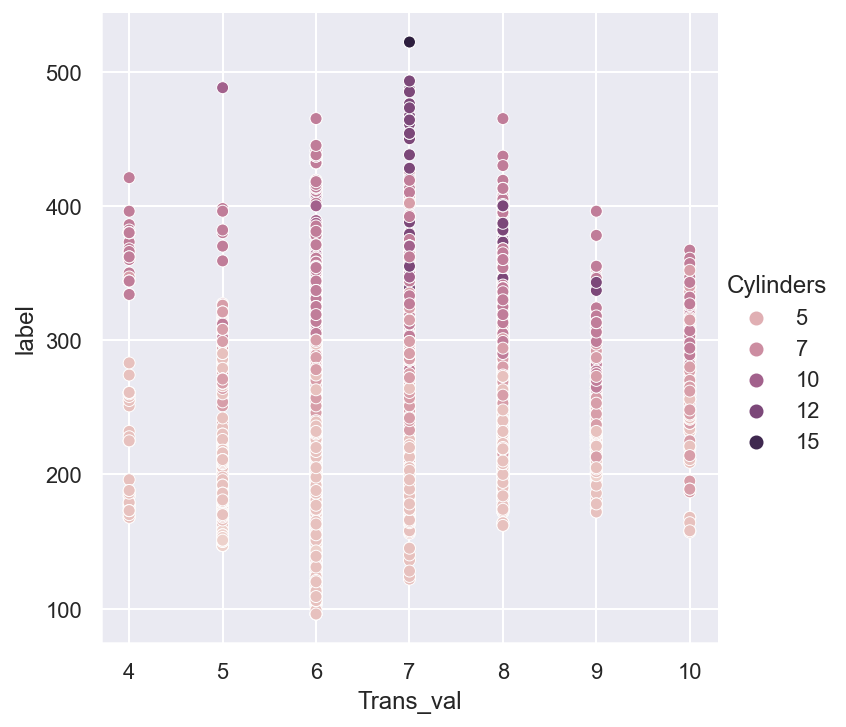

In [65]:
sns.relplot(x='Trans_val', y='label', hue='Cylinders', data=data_tc_l)

<AxesSubplot:xlabel='Cylinders', ylabel='label'>

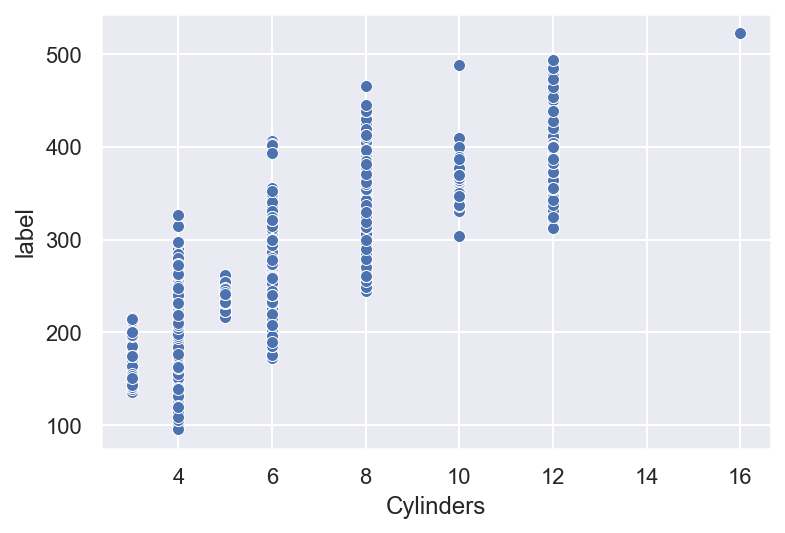

In [66]:
sns.scatterplot(x='Cylinders', y='label', data=data_tc_l)

### 1. OLS

In [69]:
# 상수항 추가
import statsmodels.api as sm

data_tc_c = sm.add_constant(data_tc, has_constant='add')

multi_model = sm.OLS(labels, data_tc_c)
f_ols = multi_model.fit()
print(f_ols.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.729
Model:                             OLS   Adj. R-squared:                  0.729
Method:                  Least Squares   F-statistic:                     3309.
Date:                 Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                         18:32:17   Log-Likelihood:                -35707.
No. Observations:                 7385   AIC:                         7.143e+04
Df Residuals:                     7378   BIC:                         7.148e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.3617      1.924     50.60

### 다중공선성?

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_tc.values, i) for i in range(len(data_tc.columns))]
vif["features"] = data_tc.columns
vif

,VIF Factor,features
0,1.202714,Trans_val
1,12.852041,AS
2,4.869879,M
3,20.750370,AV
4,3.800784,AM
5,6.152791,A
6,1.151204,Cylinders


### 2. linear Regression

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [120]:
X_train, X_test, y_train, y_test = train_test_split(data_tc, labels, test_size=0.3, random_state=8)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

pred_train = linreg.predict(X_train)
pred_test = linreg.predict(X_test)

rmse_train = (np.sqrt(mean_squared_error(y_train, pred_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

score_train = linreg.score(X_train, y_train)
score_test = linreg.score(X_test, y_test)

print("RMSE Train :",rmse_train, "/ Test :", rmse_test)
print("Score Train :",score_train, "/ Test :", score_test)

RMSE Train : 30.13866473683358 / Test : 31.182113776591354
Score Train : 0.7316445026350624 / Test : 0.7231784882668133


## 2. 이게 잘 한 것일까?

가질 수 있는 의문

1. 이상치를 제거하는 것이 더 좋을까
2. AV의 기어 숫자를 얼마를 넣어야 적절한가

## 2-1. 이상치인 부가티 제거

In [98]:
data_tc_l2 = data_tc_l.drop(index=data_tc_l[data_tc_l['Cylinders'] == 16].index)

In [102]:
data[data['Cylinders'] == 16]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
6640,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522


In [131]:
data_tc_l2[data_tc_l2['Cylinders'] == 15]

,Trans_val,AS,M,AV,AM,A,Cylinders,label


<AxesSubplot:xlabel='Cylinders', ylabel='label'>

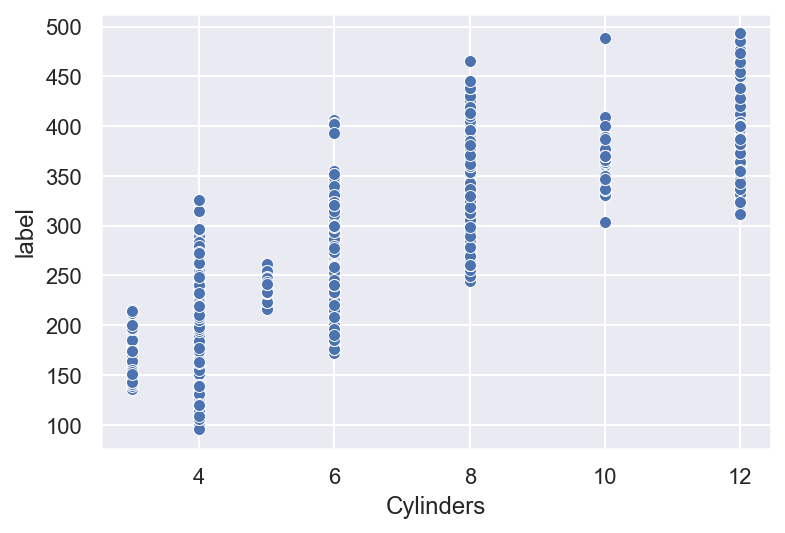

In [100]:
sns.scatterplot(x='Cylinders', y='label', data=data_tc_l2)

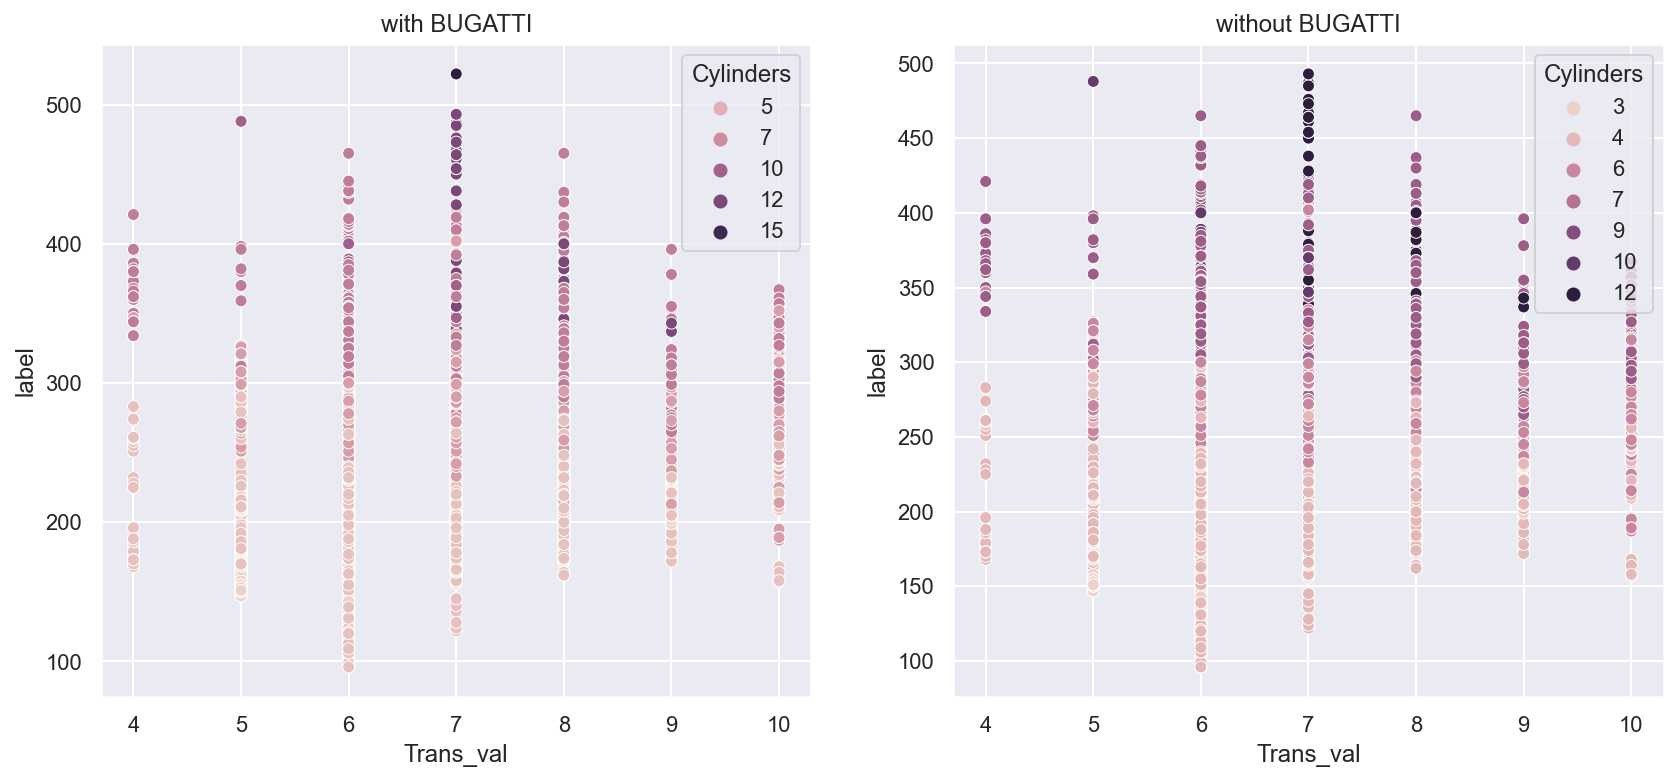

In [106]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(x='Trans_val', y='label', hue='Cylinders', data=data_tc_l, ax=ax[0])
ax[0].set_title('with BUGATTI')
sns.scatterplot(x='Trans_val', y='label', hue='Cylinders', data=data_tc_l2, ax=ax[1])
ax[1].set_title('without BUGATTI');

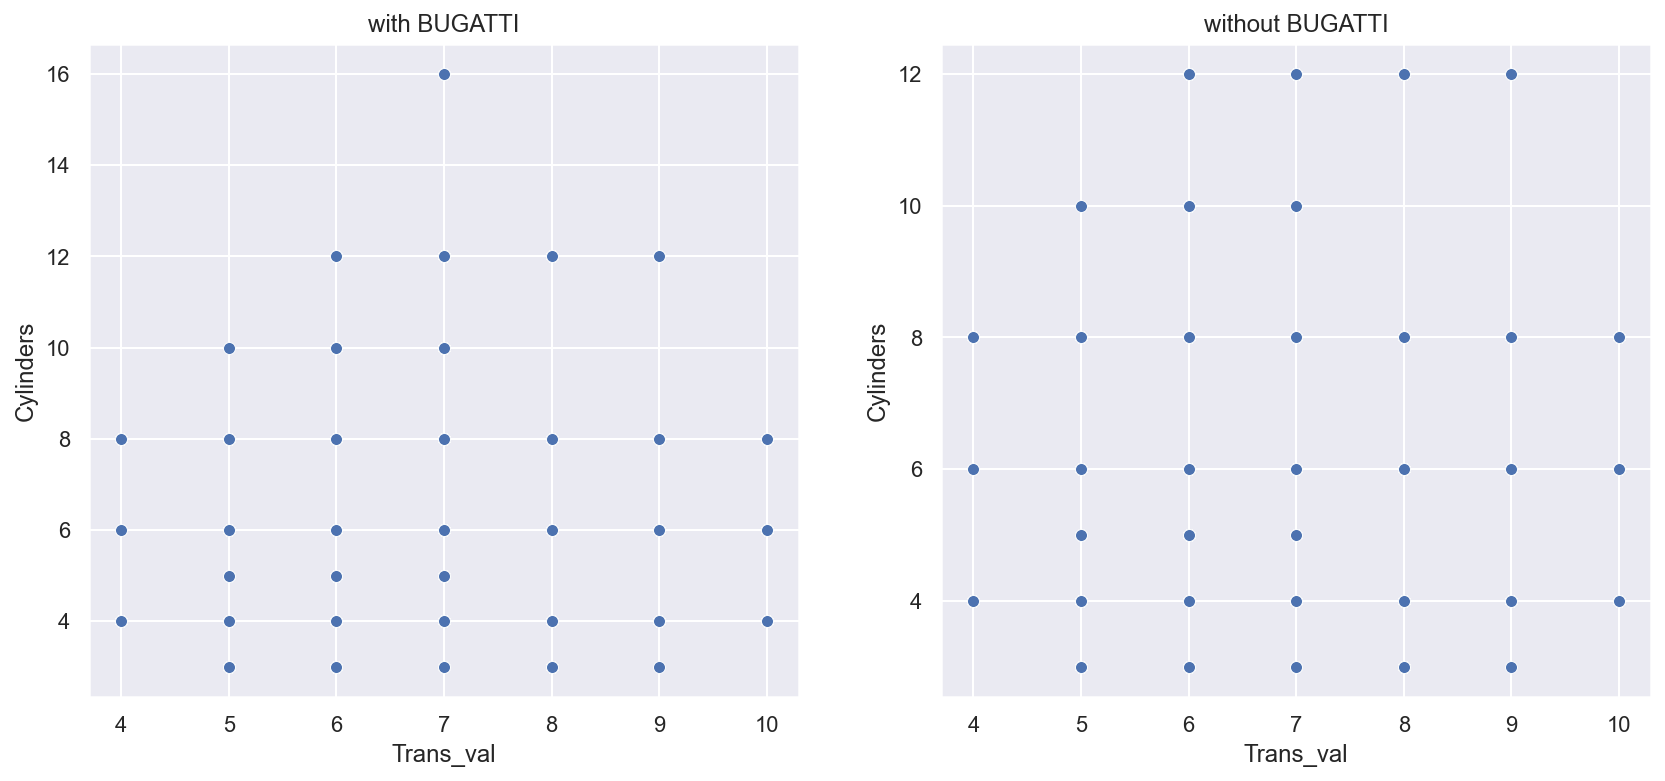

In [132]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(x='Trans_val', y='Cylinders', data=data_tc_l, ax=ax[0])
ax[0].set_title('with BUGATTI')
sns.scatterplot(x='Trans_val', y='Cylinders', data=data_tc_l2, ax=ax[1])
ax[1].set_title('without BUGATTI');

In [114]:
data_tc2 = data_tc.drop(index=data_tc[data_tc['Cylinders'] == 16].index)
labels2 = labels.drop(index=data_tc[data_tc['Cylinders'] == 16].index)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(data_tc2, labels2, test_size=0.3, random_state=8)

linreg2 = LinearRegression()
linreg2.fit(X_train, y_train)

pred_train = linreg2.predict(X_train)
pred_test = linreg2.predict(X_test)

rmse_train = (np.sqrt(mean_squared_error(y_train, pred_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

score_train = linreg2.score(X_train, y_train)
score_test = linreg2.score(X_test, y_test)

print("RMSE Train :",rmse_train, "/ Test :", rmse_test)
print("Score Train :",score_train, "/ Test :", score_test)

RMSE Train : 30.418769688230437 / Test : 30.59283985363869
Score Train : 0.7228987318028568 / Test : 0.7342372315703725


기존과 별 차이 없어보인다 

RMSE Train : 30.13866473683358 / Test : 31.182113776591354 \
Score Train : 0.7316445026350624 / Test : 0.7231784882668133

## CV

In [121]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())    
    print("표준 편차:", scores.std())

In [123]:
from sklearn.model_selection import cross_val_score

In [122]:
lireg_scores = cross_val_score(linreg2, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lireg_rmse_scores = np.sqrt(-lireg_scores)

display_scores(lireg_rmse_scores)

점수: [30.64118151 31.11959392 30.00266616 30.08659596 31.80230742 30.28646843
 29.05514381 29.0463381  29.47479707 30.32350907]
평균: 30.183860143285347
표준 편차: 0.8274757631458056


In [130]:
for dataset, labelset in zip([data_tc, data_tc2],[labels, labels2]):
    X_train, X_test, y_train, y_test = train_test_split(dataset, labelset, test_size=0.3, random_state=8)

    linreg2 = LinearRegression()
    linreg2.fit(X_train, y_train)

    pred_train = linreg2.predict(X_train)
    pred_test = linreg2.predict(X_test)

    rmse_train = (np.sqrt(mean_squared_error(y_train, pred_train)))
    rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

    score_train = linreg2.score(X_train, y_train)
    score_test = linreg2.score(X_test, y_test)

    lireg_scores = cross_val_score(linreg2, dataset, labelset, scoring="neg_mean_squared_error", cv=10)
    lireg_rmse_scores = np.sqrt(-lireg_scores)

    print('---------', len(dataset), '-----------')
    display_scores(lireg_rmse_scores)

--------- 7385 -----------
점수: [33.50609105 31.15636908 31.84894955 29.28619216 28.90296707 30.99173727
 29.02476189 29.22031121 30.59702956 30.98650955]
평균: 30.552091840602856
표준 편차: 1.3994863134116504
--------- 7382 -----------
점수: [33.52311805 31.16660426 31.75119749 29.29342049 28.95565676 31.02382245
 28.92753    29.32175884 30.60882596 30.9962932 ]
평균: 30.55682274938394
표준 편차: 1.391082138220902


## 2-2. AV의 기어 숫자 조절
최빈값인 6으로 숫자를 넣었는데, 어떤 값이 들어가야 신뢰도가 높은지? \
AV는 6,7,8,10이 있다

In [137]:
def GetTransGear(s):
    try: 
        int(s[-2:])
        return s[-2:]
    except ValueError:
        try:
            int(s[-1])
            return s[-1]
        except ValueError:
            return '8'

In [136]:
## 데이터 프레임 만들기
data_trans6 = data.copy()
data_trans6['Trans_val'] = list(map(lambda s: GetTransNum(s),data['Transmission'].values))
data_trans6['Trans_type'] = list(map(lambda s : s.split(GetTransNum(s))[0] , data['Transmission'].values))
data_trans6 = data_trans6[['Trans_val', 'Trans_type']]
data_trans6['Trans_val'] = data_trans6['Trans_val'].astype('int')

cat_encoder = OneHotEncoder()
trans_type = data_trans6['Trans_type'].to_numpy().reshape(-1, 1)
trans_1hot = cat_encoder.fit_transform(trans_type)
trans_array = trans_1hot.toarray()
data_trans6[list(data_trans6['Trans_type'].unique())] = trans_array

data_trans6 = data_trans6.drop(columns='Trans_type')
    
data_tc6 = data_trans6.copy()
data_tc6['Cylinders'] = data['Cylinders']
data_tc6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Trans_val  7385 non-null   int64  
 1   AS         7385 non-null   float64
 2   M          7385 non-null   float64
 3   AV         7385 non-null   float64
 4   AM         7385 non-null   float64
 5   A          7385 non-null   float64
 6   Cylinders  7385 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 404.0 KB


In [138]:
## 데이터 프레임 만들기
data_trans8 = data.copy()
data_trans8['Trans_val'] = list(map(lambda s: GetTransNum(s),data['Transmission'].values))
data_trans8['Trans_type'] = list(map(lambda s : s.split(GetTransNum(s))[0] , data['Transmission'].values))
data_trans8 = data_trans8[['Trans_val', 'Trans_type']]
data_trans8['Trans_val'] = data_trans8['Trans_val'].astype('int')

cat_encoder = OneHotEncoder()
trans_type = data_trans8['Trans_type'].to_numpy().reshape(-1, 1)
trans_1hot = cat_encoder.fit_transform(trans_type)
trans_array = trans_1hot.toarray()
data_trans8[list(data_trans8['Trans_type'].unique())] = trans_array

data_trans8 = data_trans8.drop(columns='Trans_type')
    
data_tc8 = data_trans8.copy()
data_tc8['Cylinders'] = data['Cylinders']
data_tc8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Trans_val  7385 non-null   int64  
 1   AS         7385 non-null   float64
 2   M          7385 non-null   float64
 3   AV         7385 non-null   float64
 4   AM         7385 non-null   float64
 5   A          7385 non-null   float64
 6   Cylinders  7385 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 404.0 KB


In [143]:
X_train, X_test, y_train, y_test = train_test_split(data_tc6, labels, test_size=0.3, random_state=8)

linreg2 = LinearRegression()
linreg2.fit(X_train, y_train)

pred_train = linreg2.predict(X_train)
pred_test = linreg2.predict(X_test)

rmse_train = (np.sqrt(mean_squared_error(y_train, pred_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

score_train = linreg2.score(X_train, y_train)
score_test = linreg2.score(X_test, y_test)

lireg_scores = cross_val_score(linreg2, data_tc6, labels, scoring="neg_mean_squared_error", cv=10)
lireg_rmse_scores = np.sqrt(-lireg_scores)

print('---------', len(data_tc6), '-----------')
display_scores(lireg_rmse_scores)

--------- 7385 -----------
점수: [33.50609105 31.15636908 31.84894955 29.28619216 28.90296707 30.99173727
 29.02476189 29.22031121 30.59702956 30.98650955]
평균: 30.552091840602856
표준 편차: 1.3994863134116504


In [144]:
X_train, X_test, y_train, y_test = train_test_split(data_tc8, labels, test_size=0.3, random_state=8)

linreg2 = LinearRegression()
linreg2.fit(X_train, y_train)

pred_train = linreg2.predict(X_train)
pred_test = linreg2.predict(X_test)

rmse_train = (np.sqrt(mean_squared_error(y_train, pred_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

score_train = linreg2.score(X_train, y_train)
score_test = linreg2.score(X_test, y_test)

lireg_scores = cross_val_score(linreg2, data_tc8, labels, scoring="neg_mean_squared_error", cv=10)
lireg_rmse_scores = np.sqrt(-lireg_scores)

print('---------', len(data_tc8), '-----------')
display_scores(lireg_rmse_scores)

--------- 7385 -----------
점수: [33.50609105 31.15636908 31.84894955 29.28619216 28.90296707 30.99173727
 29.02476189 29.22031121 30.59702956 30.98650955]
평균: 30.552091840602856
표준 편차: 1.3994863134116504
